# 📊 Load Dataset
This cell loads the **Breast Cancer Wisconsin dataset**, extracts **features** and **target labels**, and displays basic dataset details.


Dataset contains 569 samples and 30 features.
Class distribution: {'malignant': 212, 'benign': 357}


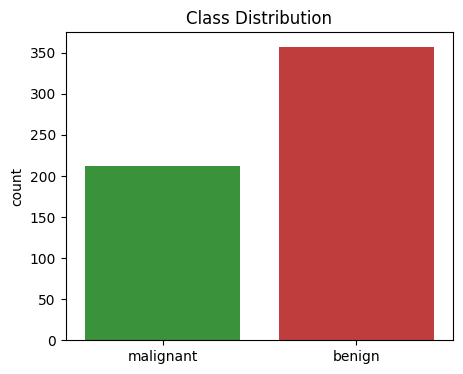

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Extract features and target
X = data.data  # Features
y = data.target  # Target variable (0 = benign, 1 = malignant)

# Feature names
feature_names = data.feature_names

# Display dataset information
print(f"Dataset contains {X.shape[0]} samples and {X.shape[1]} features.")
print(f"Class distribution: {dict(zip(data.target_names, [sum(y == 0), sum(y == 1)]))}")

# Visualize class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=y, palette=["#2ca02c", "#d62728"])
plt.xticks(ticks=[0, 1], labels=data.target_names)
plt.title("Class Distribution")
plt.show()


# ✂️ Train-Test Split
We split the dataset into **70% training** and **30% testing**, ensuring that class distribution is preserved using `stratify=y`.


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training and 30% testing while maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 398 samples
Testing set size: 171 samples


# 🔄 Preprocessing - Standardization
Standardize feature values using `StandardScaler` to improve the performance of **SVM**.


In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature values standardized using StandardScaler.")


Feature values standardized using StandardScaler.


# 🏋️ Train Default SVM Model
Train a **Support Vector Machine (SVM)** model using default hyperparameters.


In [4]:
from sklearn.svm import SVC

# Initialize and train the SVM model with default parameters
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("Default SVM model trained successfully.")


Default SVM model trained successfully.


# 🎯 Hyperparameter Tuning using GridSearchCV
Optimize the **SVM model** using `GridSearchCV` to find the best **C, gamma, and kernel** parameters.


In [5]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Reduce options
    'gamma': ['scale', 0.01, 0.1],  # Reduce gamma values
    'kernel': ['linear', 'rbf']  # Exclude 'poly' for now
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

# Use the best model
best_svm_model = grid_search.best_estimator_


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.9774


# 📏 Model Evaluation - Accuracy
Calculate and display the **training** and **testing accuracy** of the best SVM model.


In [6]:
from sklearn.metrics import accuracy_score

# Training Accuracy
train_accuracy = accuracy_score(y_train, best_svm_model.predict(X_train))
print(f"🔹 Training Accuracy: {train_accuracy:.4f}")

# Testing Accuracy
test_accuracy = accuracy_score(y_test, best_svm_model.predict(X_test))
print(f"🔹 Testing Accuracy: {test_accuracy:.4f}")


🔹 Training Accuracy: 0.9799
🔹 Testing Accuracy: 0.9708


# 🔍 Identify Important Features
Use `SelectFromModel` with a **linear SVM** to determine the most important features.


Most Important Features Identified by SVM:
1. mean compactness (Weight: 0.6405)
2. mean concavity (Weight: 0.4415)
3. texture error (Weight: 0.5675)
4. area error (Weight: 0.7662)
5. worst radius (Weight: 0.7571)
6. worst texture (Weight: 1.1240)
7. worst perimeter (Weight: 0.6417)
8. worst area (Weight: 0.9410)
9. worst smoothness (Weight: 0.6422)
10. worst concavity (Weight: 0.7394)
11. worst concave points (Weight: 0.6975)


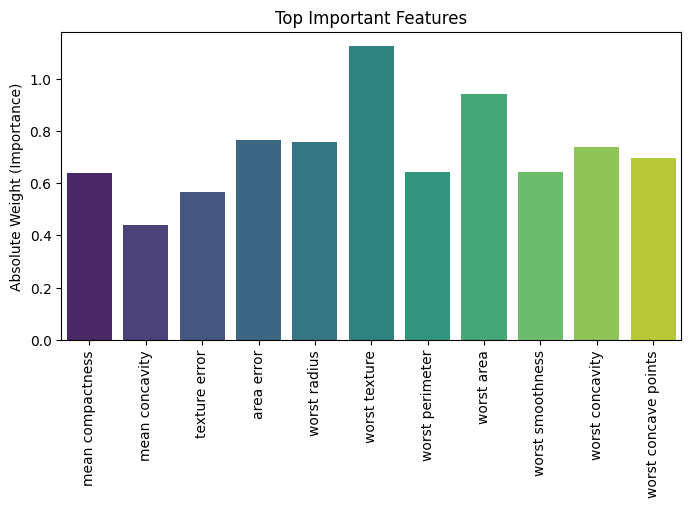

In [7]:
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Fit a linear SVM to get feature importance
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Select important features
selector = SelectFromModel(linear_svm, prefit=True)
selected_features = selector.get_support()

# Get feature names and their corresponding importance weights
important_features = [feature_names[i] for i in range(len(feature_names)) if selected_features[i]]
feature_importances = np.abs(linear_svm.coef_[0][selected_features])  # Absolute values for importance

# Print important features
print("Most Important Features Identified by SVM:")
for i, (feature, importance) in enumerate(zip(important_features, feature_importances), 1):
    print(f"{i}. {feature} (Weight: {importance:.4f})")

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=important_features, y=feature_importances, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top Important Features")
plt.ylabel("Absolute Weight (Importance)")
plt.show()


# 📊 Model Evaluation - Confusion Matrix & Metrics
Generate a **confusion matrix**, and compute:
- **Precision**
- **Recall**
- **F1-Score**
- **False Alarm Rate**


🔹 Confusion Matrix:
 [[ 60   4]
 [  1 106]]
🔹 Precision: 0.9636
🔹 Recall: 0.9907
🔹 F1-Score: 0.9770
🔹 False Alarm Rate: 0.0625

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



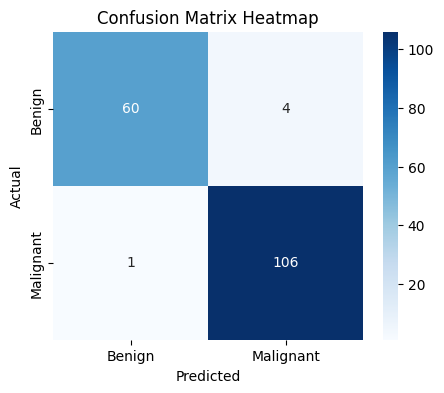

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = best_svm_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("🔹 Confusion Matrix:\n", conf_matrix)

# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Compute evaluation metrics
precision = TP / (TP + FP)  # TP / (TP + FP)
recall = TP / (TP + FN)  # TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
false_alarm_rate = FP / (FP + TN)  # FP / (FP + TN)

print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1-Score: {f1_score:.4f}")
print(f"🔹 False Alarm Rate: {false_alarm_rate:.4f}")

# Full classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Heatmap of confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


# 📘 Guide Questions and Answers

## 1️⃣ How did you preprocess the dataset?
- Checked for missing values (none found).  
- Standardized features using `StandardScaler` to ensure uniform scaling.  

---

## 2️⃣ Why split the dataset into training and testing sets?  
- Prevents overfitting by testing on unseen data.  
- Ensures the model generalizes well to new inputs.  

---

## 3️⃣ What is the role of `StandardScaler` in SVM?  
- SVM is sensitive to feature scaling.  
- `StandardScaler` ensures all features have the same scale, improving performance.  

---

## 4️⃣ How does `C` affect SVM performance?  
- **Small C** → Simpler model, allows some misclassification.  
- **Large C** → More complex model, tries to classify all points correctly.  

---

## 5️⃣ What is the purpose of the kernel function in SVM?  
- Transforms data into higher dimensions for better separation.  
- **Linear Kernel** → For linearly separable data.  
- **RBF/Polynomial Kernel** → For complex decision boundaries.  

---

## 6️⃣ What were the best hyperparameters from `GridSearchCV`?  
- **C = 0.1**, **gamma = 'scale'**, **kernel = 'linear'**  
- Achieved **97.74% accuracy** on validation data.  

---

## 7️⃣ What is a confusion matrix and how is it interpreted?  
- A table showing actual vs. predicted labels.  

---

## 8️⃣ How are Precision, Recall, and F1-score calculated?  
- **Precision:** \( TP / (TP + FP) = 0.9636 \)  
- **Recall:** \( TP / (TP + FN) = 0.9907 \)  
- **F1-score:** \( 2 × (Precision × Recall) / (Precision + Recall) = 0.9770 )

---

## 9️⃣ How to improve model performance?  
- **Feature selection** to remove irrelevant data.  
- **Try different kernels** (RBF, polynomial) if data is not linearly separable.  
- **Tune hyperparameters** further.  
- **Balance dataset** if needed (e.g., using SMOTE).  
